#Dropout Layer Research

##Loading the Dataset

In [ ]:
#mounts Google drive, which contains the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# define location of dataset

folder = '/content/drive/MyDrive/dogvscat/'

In [ ]:
def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        pyplot.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
pyplot.show()

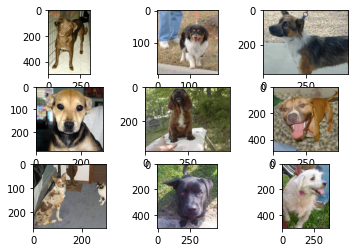

In [ ]:
displayImages(folder+"train/dog/","dog",1)


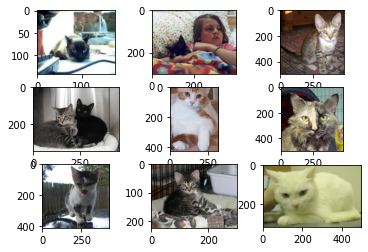

In [ ]:
displayImages(folder+"train/cat/","cat",5)

In [ ]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
img = load_img(folder+'train/dog/dog.1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in training_data_generator.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/dogvscat/preview/', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

In [ ]:
training_data_dir=folder+'train/'
validation_data_dir=folder+'validation/'
test_data_dir=folder+'test/'
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=20
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## I. Base Model

In [ ]:
#Creates the baseline model, which has three convolution layers, three max pooling layers, and two dense layers

model1 = Sequential()

model1.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3),activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3),activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(100,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
EPOCHS=30

#Trains the model
history1=model1.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-10-d4d6f73f0aaf>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(


Epoch 1/30
50/50 [==============================] - 357s 7s/step - loss: 0.7466 - accuracy: 0.5070 - val_loss: 0.8091 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 44s 880ms/step - loss: 0.7028 - accuracy: 0.5510 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 3/30
50/50 [==============================] - 44s 868ms/step - loss: 0.6927 - accuracy: 0.5740 - val_loss: 0.6658 - val_accuracy: 0.6490
Epoch 4/30
50/50 [==============================] - 45s 897ms/step - loss: 0.6688 - accuracy: 0.6080 - val_loss: 0.6536 - val_accuracy: 0.6100
Epoch 5/30
50/50 [==============================] - 47s 927ms/step - loss: 0.6443 - accuracy: 0.6500 - val_loss: 0.6540 - val_accuracy: 0.6150
Epoch 6/30
50/50 [==============================] - 48s 969ms/step - loss: 0.6361 - accuracy: 0.6430 - val_loss: 0.6256 - val_accuracy: 0.6320
Epoch 7/30
50/50 [==============================] - 44s 876ms/step - loss: 0.6335 - accuracy: 0.6310 - val_loss: 0.6199 - val_accuracy: 0.6230
E

In [ ]:
_, acc1 = model1.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains the test accuracy
print('Test Accuracy: %.3f%%' % (acc1 * 100.0)) #Prints the test accuracy

<ipython-input-11-f59fc6f78fe6>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc1 = model1.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains the test accuracy


Test Accuracy: 68.100%


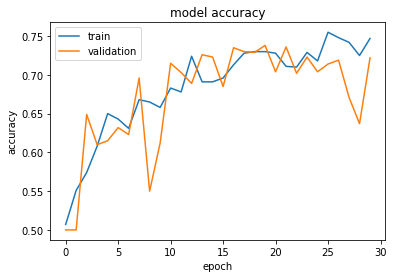

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## II. Model with One Dropout Layer

### A: After 2nd Convolution Layer

In [ ]:
#Creates a model with one dropout layer after the 2nd convolution layer w.r.t. the base model

model2a = Sequential()

model2a.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2a.add(MaxPooling2D(pool_size=(2, 2)))

model2a.add(Conv2D(32, (3, 3),activation="relu"))
model2a.add(Dropout(0.5))
model2a.add(MaxPooling2D(pool_size=(2, 2)))

model2a.add(Conv2D(32, (3, 3),activation="relu"))
model2a.add(MaxPooling2D(pool_size=(2, 2)))

model2a.add(Flatten())
model2a.add(Dense(100,activation="relu"))
model2a.add(Dense(1,activation="sigmoid"))
model2a.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2a.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 dropout_16 (Dropout)        (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 34, 34, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history2a=model2a.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-61-ce8d10c8c57e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2a=model2a.fit_generator(


Epoch 1/30
50/50 [==============================] - 47s 925ms/step - loss: 0.7416 - accuracy: 0.5170 - val_loss: 0.6924 - val_accuracy: 0.5130
Epoch 2/30
50/50 [==============================] - 47s 949ms/step - loss: 0.7199 - accuracy: 0.5580 - val_loss: 0.6879 - val_accuracy: 0.5790
Epoch 3/30
50/50 [==============================] - 46s 911ms/step - loss: 0.7069 - accuracy: 0.5520 - val_loss: 0.6820 - val_accuracy: 0.6480
Epoch 4/30
50/50 [==============================] - 45s 908ms/step - loss: 0.6756 - accuracy: 0.5900 - val_loss: 0.6578 - val_accuracy: 0.6660
Epoch 5/30
50/50 [==============================] - 45s 905ms/step - loss: 0.6679 - accuracy: 0.6250 - val_loss: 0.6515 - val_accuracy: 0.6210
Epoch 6/30
50/50 [==============================] - 47s 947ms/step - loss: 0.6608 - accuracy: 0.6080 - val_loss: 0.6198 - val_accuracy: 0.7020
Epoch 7/30
50/50 [==============================] - 45s 903ms/step - loss: 0.6536 - accuracy: 0.6340 - val_loss: 0.6224 - val_accuracy: 0.6550

In [ ]:
_, acc2a = model2a.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2a * 100.0)) #Prints test accuracy

<ipython-input-62-511ae7c9e9a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2a = model2a.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 68.300%


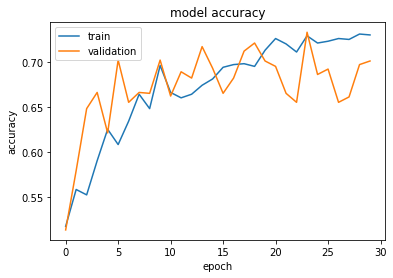

In [ ]:
# summarize history for accuracy
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### B: After Flatten Layer

In [ ]:
#Creates a model with one dropout layer after the flatten layer w.r.t. the base model

model2b = Sequential()

model2b.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2b.add(MaxPooling2D(pool_size=(2, 2)))

model2b.add(Conv2D(32, (3, 3),activation="relu"))
model2b.add(MaxPooling2D(pool_size=(2, 2)))

model2b.add(Conv2D(32, (3, 3),activation="relu"))
model2b.add(MaxPooling2D(pool_size=(2, 2)))

model2b.add(Flatten())
model2b.add(Dropout(0.5))
model2b.add(Dense(100,activation="relu"))
model2b.add(Dense(1,activation="sigmoid"))
model2b.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history2b=model2b.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-18-cc85e1afd2e1>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2b=model2b.fit_generator(


Epoch 1/30
50/50 [==============================] - 46s 902ms/step - loss: 0.7270 - accuracy: 0.5180 - val_loss: 0.6877 - val_accuracy: 0.5010
Epoch 2/30
50/50 [==============================] - 44s 887ms/step - loss: 0.6957 - accuracy: 0.5320 - val_loss: 0.6713 - val_accuracy: 0.5960
Epoch 3/30
50/50 [==============================] - 45s 890ms/step - loss: 0.6863 - accuracy: 0.5830 - val_loss: 0.6620 - val_accuracy: 0.5720
Epoch 4/30
50/50 [==============================] - 44s 874ms/step - loss: 0.6767 - accuracy: 0.5890 - val_loss: 0.6519 - val_accuracy: 0.6740
Epoch 5/30
50/50 [==============================] - 44s 877ms/step - loss: 0.6478 - accuracy: 0.6430 - val_loss: 0.6400 - val_accuracy: 0.6290
Epoch 6/30
50/50 [==============================] - 44s 878ms/step - loss: 0.6268 - accuracy: 0.6640 - val_loss: 0.6238 - val_accuracy: 0.6380
Epoch 7/30
50/50 [==============================] - 43s 865ms/step - loss: 0.6388 - accuracy: 0.6360 - val_loss: 0.6030 - val_accuracy: 0.6730

In [ ]:
_, acc2b = model2b.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2b * 100.0)) #Prints test accuracy

<ipython-input-19-286d9080bd85>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2b = model2b.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 71.200%


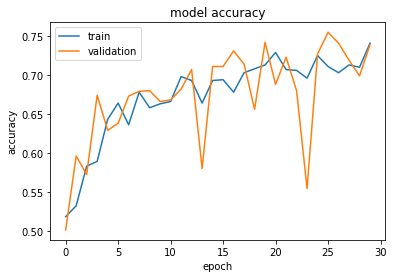

In [ ]:
# summarize history for accuracy
plt.plot(history2b.history['accuracy'])
plt.plot(history2b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### C. After 1st Dense Layer

In [ ]:
#Creates a model with one dropout layer after the 1st dense Layer (i.e. the hidden layer) w.r.t. the base model

model2c = Sequential()

model2c.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2c.add(MaxPooling2D(pool_size=(2, 2)))

model2c.add(Conv2D(32, (3, 3),activation="relu"))
model2c.add(MaxPooling2D(pool_size=(2, 2)))

model2c.add(Conv2D(32, (3, 3),activation="relu"))
model2c.add(MaxPooling2D(pool_size=(2, 2)))

model2c.add(Flatten())
model2c.add(Dense(100,activation="relu"))
model2c.add(Dropout(0.5))
model2c.add(Dense(1,activation="sigmoid"))
model2c.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history2c=model2c.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-22-aa0d7ae1b46d>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2c=model2c.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 885ms/step - loss: 0.7099 - accuracy: 0.5080 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 45s 903ms/step - loss: 0.6947 - accuracy: 0.5370 - val_loss: 0.6800 - val_accuracy: 0.5330
Epoch 3/30
50/50 [==============================] - 44s 883ms/step - loss: 0.6894 - accuracy: 0.5520 - val_loss: 0.6703 - val_accuracy: 0.6260
Epoch 4/30
50/50 [==============================] - 44s 871ms/step - loss: 0.6792 - accuracy: 0.6060 - val_loss: 0.6445 - val_accuracy: 0.5830
Epoch 5/30
50/50 [==============================] - 43s 865ms/step - loss: 0.6675 - accuracy: 0.6090 - val_loss: 0.6560 - val_accuracy: 0.5860
Epoch 6/30
50/50 [==============================] - 44s 877ms/step - loss: 0.6795 - accuracy: 0.6230 - val_loss: 0.6082 - val_accuracy: 0.6580
Epoch 7/30
50/50 [==============================] - 43s 857ms/step - loss: 0.6443 - accuracy: 0.6600 - val_loss: 0.6265 - val_accuracy: 0.6500

In [ ]:
_, acc2c = model2c.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2c * 100.0)) #Prints test accuracy

<ipython-input-23-62bed9bd607b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2c = model2c.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 70.200%


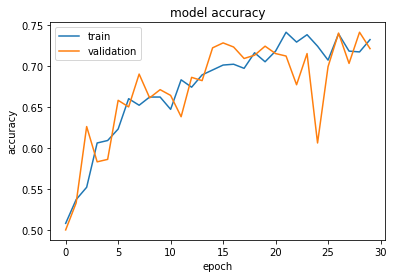

In [ ]:
# summarize history for accuracy
plt.plot(history2c.history['accuracy'])
plt.plot(history2c.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####C.1 After 1st Dense Layer with Low Dropout Rate

In [ ]:
#Creates a model with one dropout layer after the 1st dense Layer (i.e. the hidden layer) and low dropout rate w.r.t. the base model

model2c1 = Sequential()

model2c1.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2c1.add(MaxPooling2D(pool_size=(2, 2)))

model2c1.add(Conv2D(32, (3, 3),activation="relu"))
model2c1.add(MaxPooling2D(pool_size=(2, 2)))

model2c1.add(Conv2D(32, (3, 3),activation="relu"))
model2c1.add(MaxPooling2D(pool_size=(2, 2)))

model2c1.add(Flatten())
model2c1.add(Dense(100,activation="relu"))
model2c1.add(Dropout(0.3))
model2c1.add(Dense(1,activation="sigmoid"))
model2c1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2c1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history2c1=model2c1.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-26-26d149dd8e7a>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2c1=model2c1.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 885ms/step - loss: 0.7256 - accuracy: 0.5290 - val_loss: 0.6896 - val_accuracy: 0.6000
Epoch 2/30
50/50 [==============================] - 44s 874ms/step - loss: 0.6964 - accuracy: 0.5220 - val_loss: 0.6790 - val_accuracy: 0.6000
Epoch 3/30
50/50 [==============================] - 44s 881ms/step - loss: 0.7040 - accuracy: 0.5560 - val_loss: 0.6677 - val_accuracy: 0.6040
Epoch 4/30
50/50 [==============================] - 43s 867ms/step - loss: 0.6830 - accuracy: 0.5910 - val_loss: 0.6395 - val_accuracy: 0.6400
Epoch 5/30
50/50 [==============================] - 43s 865ms/step - loss: 0.6615 - accuracy: 0.6160 - val_loss: 0.6321 - val_accuracy: 0.6380
Epoch 6/30
50/50 [==============================] - 44s 871ms/step - loss: 0.6389 - accuracy: 0.6540 - val_loss: 0.6109 - val_accuracy: 0.6570
Epoch 7/30
50/50 [==============================] - 44s 872ms/step - loss: 0.6399 - accuracy: 0.6490 - val_loss: 0.5952 - val_accuracy: 0.6690

In [ ]:
_, acc2c1 = model2c1.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2c1 * 100.0)) #Prints test accuracy

<ipython-input-27-eb1026fc2e09>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2c1 = model2c1.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 72.200%


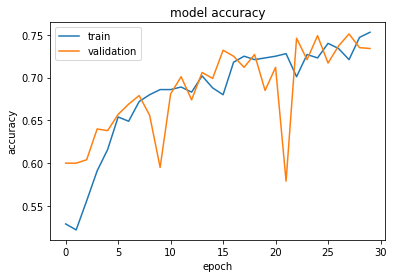

In [ ]:
# summarize history for accuracy
plt.plot(history2c1.history['accuracy'])
plt.plot(history2c1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####C.2 After 1st Dense Layer with High Dropout Rate

In [ ]:
#Creates a model with one dropout layer after the 1st dense Layer (i.e. the hidden layer) and high dropout rate w.r.t. the base model

model2c2 = Sequential()

model2c2.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2c2.add(MaxPooling2D(pool_size=(2, 2)))

model2c2.add(Conv2D(32, (3, 3),activation="relu"))
model2c2.add(MaxPooling2D(pool_size=(2, 2)))

model2c2.add(Conv2D(32, (3, 3),activation="relu"))
model2c2.add(MaxPooling2D(pool_size=(2, 2)))

model2c2.add(Flatten())
model2c2.add(Dense(100,activation="relu"))
model2c2.add(Dropout(0.7))
model2c2.add(Dense(1,activation="sigmoid"))
model2c2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2c2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history2c2=model2c2.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-30-d62f91439aa6>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2c2=model2c2.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 872ms/step - loss: 0.7167 - accuracy: 0.5140 - val_loss: 0.6838 - val_accuracy: 0.5060
Epoch 2/30
50/50 [==============================] - 43s 867ms/step - loss: 0.7057 - accuracy: 0.5530 - val_loss: 0.6830 - val_accuracy: 0.5610
Epoch 3/30
50/50 [==============================] - 43s 861ms/step - loss: 0.6864 - accuracy: 0.5530 - val_loss: 0.6677 - val_accuracy: 0.6060
Epoch 4/30
50/50 [==============================] - 43s 859ms/step - loss: 0.6664 - accuracy: 0.5970 - val_loss: 0.6696 - val_accuracy: 0.5630
Epoch 5/30
50/50 [==============================] - 43s 861ms/step - loss: 0.6627 - accuracy: 0.5910 - val_loss: 0.6571 - val_accuracy: 0.6230
Epoch 6/30
50/50 [==============================] - 43s 855ms/step - loss: 0.6513 - accuracy: 0.6070 - val_loss: 0.6429 - val_accuracy: 0.6490
Epoch 7/30
50/50 [==============================] - 45s 903ms/step - loss: 0.6588 - accuracy: 0.6160 - val_loss: 0.6433 - val_accuracy: 0.6070

In [ ]:
_, acc2c2 = model2c2.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2c2 * 100.0)) #Prints test accuracy

<ipython-input-31-c8d46f169d70>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2c2 = model2c2.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 72.500%


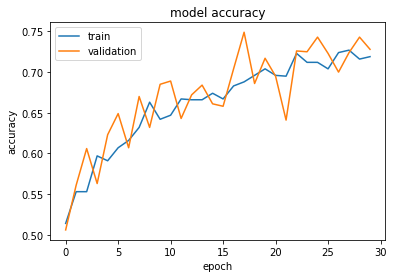

In [ ]:
# summarize history for accuracy
plt.plot(history2c2.history['accuracy'])
plt.plot(history2c2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### D. After 1st Max Pooling Layer

In [ ]:
#Creates a model with one dropout layer after the 1st max pooling layer w.r.t. the base model

model2d = Sequential()

model2d.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model2d.add(MaxPooling2D(pool_size=(2, 2)))
model2d.add(Dropout(0.5))

model2d.add(Conv2D(32, (3, 3),activation="relu"))
model2d.add(MaxPooling2D(pool_size=(2, 2)))

model2d.add(Conv2D(32, (3, 3),activation="relu"))
model2d.add(MaxPooling2D(pool_size=(2, 2)))

model2d.add(Flatten())
model2d.add(Dense(100,activation="relu"))
model2d.add(Dense(1,activation="sigmoid"))
model2d.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model2d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 32)       

In [ ]:
EPOCHS=30

#Trains the model
history2d=model2d.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-34-d7180a98cbd8>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2d=model2d.fit_generator(


Epoch 1/30
50/50 [==============================] - 46s 912ms/step - loss: 0.7763 - accuracy: 0.4940 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 46s 911ms/step - loss: 0.6975 - accuracy: 0.5250 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 3/30
50/50 [==============================] - 46s 914ms/step - loss: 0.7060 - accuracy: 0.5160 - val_loss: 0.6921 - val_accuracy: 0.5730
Epoch 4/30
50/50 [==============================] - 46s 913ms/step - loss: 0.6952 - accuracy: 0.5430 - val_loss: 0.6815 - val_accuracy: 0.5020
Epoch 5/30
50/50 [==============================] - 46s 910ms/step - loss: 0.6893 - accuracy: 0.5560 - val_loss: 0.6817 - val_accuracy: 0.5800
Epoch 6/30
50/50 [==============================] - 45s 906ms/step - loss: 0.6996 - accuracy: 0.5680 - val_loss: 0.6652 - val_accuracy: 0.5960
Epoch 7/30
50/50 [==============================] - 45s 904ms/step - loss: 0.6648 - accuracy: 0.5840 - val_loss: 0.6547 - val_accuracy: 0.6010

In [ ]:
_, acc2d = model2d.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy
print('Test Accuracy: %.3f%%' % (acc2d * 100.0)) #Prints test accuracy

<ipython-input-35-d5a907cd9c0b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc2d = model2d.evaluate_generator(test_generator, steps=len(test_generator), verbose=0) #Obtains test accuracy


Test Accuracy: 67.300%


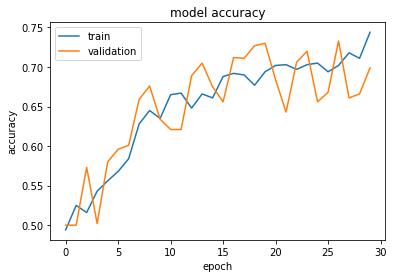

In [ ]:
# summarize history for accuracy
plt.plot(history2d.history['accuracy'])
plt.plot(history2d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## III. Model with Two Dropout Layers: After Flatten and 1st Dense Layer

### A. 0.5 Dropout Rate

In [ ]:
#Creates model with two dropout layers, both with rate 0.5 w.r.t. the base model

model3a = Sequential()

model3a.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model3a.add(MaxPooling2D(pool_size=(2, 2)))

model3a.add(Conv2D(32, (3, 3),activation="relu"))
model3a.add(MaxPooling2D(pool_size=(2, 2)))

model3a.add(Conv2D(32, (3, 3),activation="relu"))
model3a.add(MaxPooling2D(pool_size=(2, 2)))

model3a.add(Flatten())
model3a.add(Dropout(0.5))
model3a.add(Dense(100,activation="relu"))
model3a.add(Dropout(0.5))
model3a.add(Dense(1,activation="sigmoid"))
model3a.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model3a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
EPOCHS=30

#Trains the model
history3a=model3a.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-38-51e33af45507>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3a=model3a.fit_generator(


Epoch 1/30
50/50 [==============================] - 44s 866ms/step - loss: 0.7284 - accuracy: 0.5030 - val_loss: 0.6894 - val_accuracy: 0.5550
Epoch 2/30
50/50 [==============================] - 43s 867ms/step - loss: 0.6917 - accuracy: 0.5230 - val_loss: 0.6777 - val_accuracy: 0.5320
Epoch 3/30
50/50 [==============================] - 43s 867ms/step - loss: 0.7020 - accuracy: 0.5590 - val_loss: 0.6882 - val_accuracy: 0.5360
Epoch 4/30
50/50 [==============================] - 43s 859ms/step - loss: 0.6731 - accuracy: 0.5640 - val_loss: 0.6720 - val_accuracy: 0.5160
Epoch 5/30
50/50 [==============================] - 43s 861ms/step - loss: 0.6800 - accuracy: 0.5610 - val_loss: 0.6544 - val_accuracy: 0.6040
Epoch 6/30
50/50 [==============================] - 43s 862ms/step - loss: 0.6650 - accuracy: 0.6030 - val_loss: 0.6445 - val_accuracy: 0.6370
Epoch 7/30
50/50 [==============================] - 43s 860ms/step - loss: 0.6535 - accuracy: 0.6570 - val_loss: 0.6401 - val_accuracy: 0.5830

In [ ]:
_, acc3a = model3a.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc3a * 100.0))

<ipython-input-39-40529e9f1006>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc3a = model3a.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 70.400%


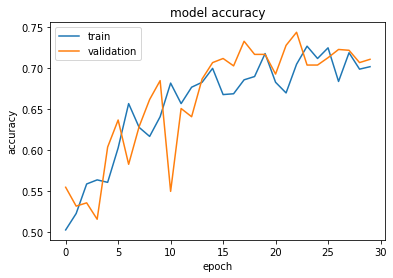

In [ ]:
# summarize history for accuracy
plt.plot(history3a.history['accuracy'])
plt.plot(history3a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### B. 1st Dropout Layer with Lower Rate and 2nd Dropout Layer with Higher Rate

In [ ]:
#Creates model where the 1st dropout layer has lower dropout rate and the 2nd has a higher dropout rate w.r.t. the base model

model3b = Sequential()

model3b.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model3b.add(MaxPooling2D(pool_size=(2, 2)))

model3b.add(Conv2D(32, (3, 3),activation="relu"))
model3b.add(MaxPooling2D(pool_size=(2, 2)))

model3b.add(Conv2D(32, (3, 3),activation="relu"))
model3b.add(MaxPooling2D(pool_size=(2, 2)))

model3b.add(Flatten())
model3b.add(Dropout(0.3))
model3b.add(Dense(100,activation="relu"))
model3b.add(Dropout(0.7))
model3b.add(Dense(1,activation="sigmoid"))
model3b.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model3b.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 17, 17, 32)     

In [ ]:
EPOCHS=30

#Trains the model
history3b=model3b.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-68-853e6e472cbc>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3b=model3b.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 877ms/step - loss: 0.7018 - accuracy: 0.5370 - val_loss: 0.6845 - val_accuracy: 0.5030
Epoch 2/30
50/50 [==============================] - 45s 899ms/step - loss: 0.6934 - accuracy: 0.5400 - val_loss: 0.6805 - val_accuracy: 0.5970
Epoch 3/30
50/50 [==============================] - 43s 856ms/step - loss: 0.6861 - accuracy: 0.5990 - val_loss: 0.6558 - val_accuracy: 0.5410
Epoch 4/30
50/50 [==============================] - 45s 902ms/step - loss: 0.6711 - accuracy: 0.6240 - val_loss: 0.6386 - val_accuracy: 0.6030
Epoch 5/30
50/50 [==============================] - 44s 870ms/step - loss: 0.6397 - accuracy: 0.6420 - val_loss: 0.6273 - val_accuracy: 0.6520
Epoch 6/30
50/50 [==============================] - 45s 896ms/step - loss: 0.6519 - accuracy: 0.6530 - val_loss: 0.6297 - val_accuracy: 0.6090
Epoch 7/30
50/50 [==============================] - 43s 862ms/step - loss: 0.6273 - accuracy: 0.6600 - val_loss: 0.6128 - val_accuracy: 0.6610

In [ ]:
_, acc3b = model3b.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc3b * 100.0))

<ipython-input-69-4b1a4c6d3064>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc3b = model3b.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 70.300%


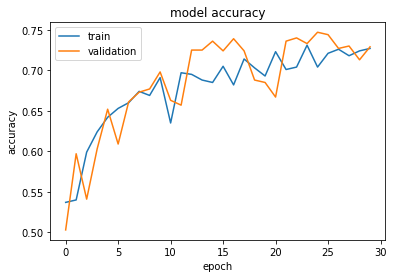

In [ ]:
# summarize history for accuracy
plt.plot(history3b.history['accuracy'])
plt.plot(history3b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### C. 1st Dropout Layer with Higher Rate and 2nd Dropout Layer with Lower Rate

In [ ]:
#Creates model where the 1st dropout layer has higher dropout rate and the 2nd has a lower dropout rate w.r.t. the base model

model3c = Sequential()

model3c.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model3c.add(MaxPooling2D(pool_size=(2, 2)))

model3c.add(Conv2D(32, (3, 3),activation="relu"))
model3c.add(MaxPooling2D(pool_size=(2, 2)))

model3c.add(Conv2D(32, (3, 3),activation="relu"))
model3c.add(MaxPooling2D(pool_size=(2, 2)))

model3c.add(Flatten())
model3c.add(Dropout(0.7))
model3c.add(Dense(100,activation="relu"))
model3c.add(Dropout(0.3))
model3c.add(Dense(1,activation="sigmoid"))
model3c.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model3c.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 17, 17, 32)     

In [ ]:
EPOCHS=30

#Trains the model
history3c=model3c.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-72-d420860d101b>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3c=model3c.fit_generator(


Epoch 1/30
50/50 [==============================] - 47s 906ms/step - loss: 0.7058 - accuracy: 0.5310 - val_loss: 0.6898 - val_accuracy: 0.5900
Epoch 2/30
50/50 [==============================] - 44s 869ms/step - loss: 0.7016 - accuracy: 0.5470 - val_loss: 0.6769 - val_accuracy: 0.5290
Epoch 3/30
50/50 [==============================] - 46s 915ms/step - loss: 0.6894 - accuracy: 0.5650 - val_loss: 0.6637 - val_accuracy: 0.5420
Epoch 4/30
50/50 [==============================] - 43s 865ms/step - loss: 0.6750 - accuracy: 0.5920 - val_loss: 0.6628 - val_accuracy: 0.5580
Epoch 5/30
50/50 [==============================] - 43s 864ms/step - loss: 0.6718 - accuracy: 0.6120 - val_loss: 0.6381 - val_accuracy: 0.6180
Epoch 6/30
50/50 [==============================] - 44s 870ms/step - loss: 0.6488 - accuracy: 0.6350 - val_loss: 0.6033 - val_accuracy: 0.6800
Epoch 7/30
50/50 [==============================] - 43s 864ms/step - loss: 0.6296 - accuracy: 0.6440 - val_loss: 0.6089 - val_accuracy: 0.6800

In [ ]:
_, acc3c = model3c.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc3c * 100.0))

<ipython-input-73-1f9c1e8d4777>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc3c = model3c.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 71.500%


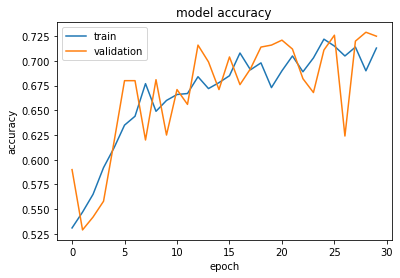

In [ ]:
# summarize history for accuracy
plt.plot(history3c.history['accuracy'])
plt.plot(history3c.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### D. 1st Dropout Layer and 2nd Dropout Layer with Low Rate

In [ ]:
#Creates model where the 1st dropout layer and the 2nd have a low dropout rate w.r.t. the base model

model3d = Sequential()

model3d.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model3d.add(MaxPooling2D(pool_size=(2, 2)))

model3d.add(Conv2D(32, (3, 3),activation="relu"))
model3d.add(MaxPooling2D(pool_size=(2, 2)))

model3d.add(Conv2D(32, (3, 3),activation="relu"))
model3d.add(MaxPooling2D(pool_size=(2, 2)))

model3d.add(Flatten())
model3d.add(Dropout(0.3))
model3d.add(Dense(100,activation="relu"))
model3d.add(Dropout(0.3))
model3d.add(Dense(1,activation="sigmoid"))
model3d.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model3d.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 32)     

In [ ]:
EPOCHS=30

#Trains the model
history3d=model3d.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-50-2966bef8ff43>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3d=model3d.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 878ms/step - loss: 0.7004 - accuracy: 0.5060 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 43s 868ms/step - loss: 0.6900 - accuracy: 0.5190 - val_loss: 0.6714 - val_accuracy: 0.5650
Epoch 3/30
50/50 [==============================] - 43s 862ms/step - loss: 0.6761 - accuracy: 0.6050 - val_loss: 0.6487 - val_accuracy: 0.6050
Epoch 4/30
50/50 [==============================] - 44s 871ms/step - loss: 0.6672 - accuracy: 0.6110 - val_loss: 0.6711 - val_accuracy: 0.5780
Epoch 5/30
50/50 [==============================] - 43s 854ms/step - loss: 0.6414 - accuracy: 0.6290 - val_loss: 0.6184 - val_accuracy: 0.6550
Epoch 6/30
50/50 [==============================] - 44s 871ms/step - loss: 0.6411 - accuracy: 0.6530 - val_loss: 0.6127 - val_accuracy: 0.6750
Epoch 7/30
50/50 [==============================] - 43s 861ms/step - loss: 0.6155 - accuracy: 0.6760 - val_loss: 0.6398 - val_accuracy: 0.6260

In [ ]:
_, acc3d = model3d.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc3d * 100.0))

<ipython-input-51-c3ce13d4c6e3>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc3d = model3d.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 70.800%


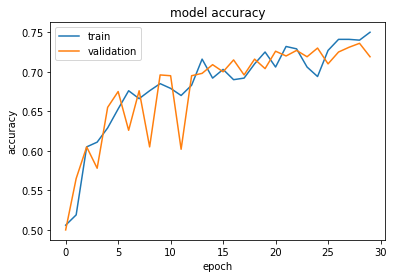

In [ ]:
# summarize history for accuracy
plt.plot(history3d.history['accuracy'])
plt.plot(history3d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### E. 1st Dropout Layer and 2nd Dropout Layer with High Rate

In [ ]:
#Creates model where the 1st dropout layer and the 2nd have a high dropout rate w.r.t. the base model

model3e = Sequential()

model3e.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model3e.add(MaxPooling2D(pool_size=(2, 2)))

model3e.add(Conv2D(32, (3, 3),activation="relu"))
model3e.add(MaxPooling2D(pool_size=(2, 2)))

model3e.add(Conv2D(32, (3, 3),activation="relu"))
model3e.add(MaxPooling2D(pool_size=(2, 2)))

model3e.add(Flatten())
model3e.add(Dropout(0.7))
model3e.add(Dense(100,activation="relu"))
model3e.add(Dropout(0.7))
model3e.add(Dense(1,activation="sigmoid"))
model3e.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model3e.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 17, 17, 32)     

In [ ]:
EPOCHS=30

#Trains the model
history3e=model3e.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-54-2792089a2764>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3e=model3e.fit_generator(


Epoch 1/30
50/50 [==============================] - 45s 884ms/step - loss: 0.7393 - accuracy: 0.4970 - val_loss: 0.6908 - val_accuracy: 0.5740
Epoch 2/30
50/50 [==============================] - 44s 869ms/step - loss: 0.7005 - accuracy: 0.5250 - val_loss: 0.6896 - val_accuracy: 0.5590
Epoch 3/30
50/50 [==============================] - 43s 865ms/step - loss: 0.6946 - accuracy: 0.5340 - val_loss: 0.6808 - val_accuracy: 0.5900
Epoch 4/30
50/50 [==============================] - 43s 862ms/step - loss: 0.6877 - accuracy: 0.5620 - val_loss: 0.6793 - val_accuracy: 0.5590
Epoch 5/30
50/50 [==============================] - 43s 858ms/step - loss: 0.6835 - accuracy: 0.5870 - val_loss: 0.6650 - val_accuracy: 0.5780
Epoch 6/30
50/50 [==============================] - 43s 859ms/step - loss: 0.6618 - accuracy: 0.6120 - val_loss: 0.6725 - val_accuracy: 0.5780
Epoch 7/30
50/50 [==============================] - 45s 908ms/step - loss: 0.6740 - accuracy: 0.6100 - val_loss: 0.6395 - val_accuracy: 0.6300

In [ ]:
_, acc3e = model3e.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc3e * 100.0))

<ipython-input-55-555531791ec8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc3e = model3e.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 68.200%


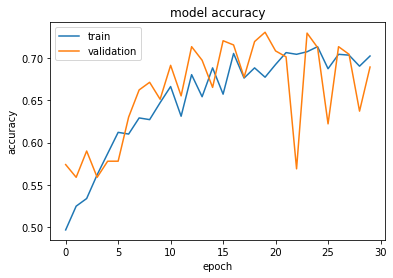

In [ ]:
# summarize history for accuracy
plt.plot(history3e.history['accuracy'])
plt.plot(history3e.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Summary of Results

In [ ]:
import pandas as pd

#Creates a table that shows test accuracy for each network model

data_model1= {'Model #': '1', 'Number of Dropout Layers': '0', 'Location of Dropout Layer(s)': 'NA', 'Dropout Rate(s)': 'NA', 'Test accuracy': [round(acc1*100,3)]}
table= pd.DataFrame(data_model1)

data_model2a= {'Model #': '2a', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After 2nd convolution layer', 'Dropout Rate(s)': '0.5', 'Test accuracy': [round(acc2a*100,3)]}
table= table.append(data_model2a, ignore_index=True)

data_model2b= {'Model #': '2b', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After flatten layer', 'Dropout Rate(s)': '0.5', 'Test accuracy': [round(acc2b*100,3)]}
table= table.append(data_model2b, ignore_index=True)

data_model2c= {'Model #': '2c', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After 1st dense layer', 'Dropout Rate(s)': '0.5', 'Test accuracy': [round(acc2c*100,3)]}
table= table.append(data_model2c, ignore_index=True)

data_model2c1= {'Model #': '2c1', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After 1st dense layer', 'Dropout Rate(s)': '0.3', 'Test accuracy': [round(acc2c1*100,3)]}
table= table.append(data_model2c1, ignore_index=True)

data_model2c2= {'Model #': '2c2', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After 1st dense layer', 'Dropout Rate(s)': '0.7', 'Test accuracy': [round(acc2c2*100,3)]}
table= table.append(data_model2c2, ignore_index=True)

data_model2d= {'Model #': '2d', 'Number of Dropout Layers': '1', 'Location of Dropout Layer(s)': 'After 1st max pooling layer', 'Dropout Rate(s)': '0.5', 'Test accuracy': [round(acc2d*100,3)]}
table= table.append(data_model2d, ignore_index=True)

data_model3a= {'Model #': '3a', 'Number of Dropout Layers': '2', 'Location of Dropout Layer(s)': 'After flatten layer and 1st dense layer', 'Dropout Rate(s)': '0.5 and 0.5', 'Test accuracy': [round(acc3a*100,3)]}
table= table.append(data_model3a, ignore_index=True)

data_model3b= {'Model #': '3b', 'Number of Dropout Layers': '2', 'Location of Dropout Layer(s)': 'After flatten layer and 1st dense layer', 'Dropout Rate(s)': '0.3 and 0.7', 'Test accuracy': [round(acc3b*100,3)]}
table= table.append(data_model3b, ignore_index=True)

data_model3c= {'Model #': '3c', 'Number of Dropout Layers': '2', 'Location of Dropout Layer(s)': 'After flatten layer and 1st dense layer', 'Dropout Rate(s)': '0.7 and 0.3', 'Test accuracy': [round(acc3c*100,3)]}
table= table.append(data_model3c, ignore_index=True)

data_model3d= {'Model #': '3d', 'Number of Dropout Layers': '2', 'Location of Dropout Layer(s)': 'After flatten layer and 1st dense layer', 'Dropout Rate(s)': '0.3 and 0.3', 'Test accuracy': [round(acc3d*100,3)]}
table= table.append(data_model3d, ignore_index=True)

data_model3e= {'Model #': '3e', 'Number of Dropout Layers': '2', 'Location of Dropout Layer(s)': 'After flatten layer and 1st dense layer', 'Dropout Rate(s)': '0.7 and 0.7', 'Test accuracy': [round(acc3e*100,3)]}
table= table.append(data_model3e, ignore_index=True)

In [ ]:
print(table) #shows the test accuracies in a table for each model

   Model # Number of Dropout Layers             Location of Dropout Layer(s)  \
0        1                        0                                       NA   
1       2a                        1              After 2nd convolution layer   
2       2b                        1                      After flatten layer   
3       2c                        1                    After 1st dense layer   
4      2c1                        1                    After 1st dense layer   
5      2c2                        1                    After 1st dense layer   
6       2d                        1              After 1st max pooling layer   
7       3a                        2  After flatten layer and 1st dense layer   
8       3b                        2  After flatten layer and 1st dense layer   
9       3c                        2  After flatten layer and 1st dense layer   
10      3d                        2  After flatten layer and 1st dense layer   
11      3e                        2  Aft

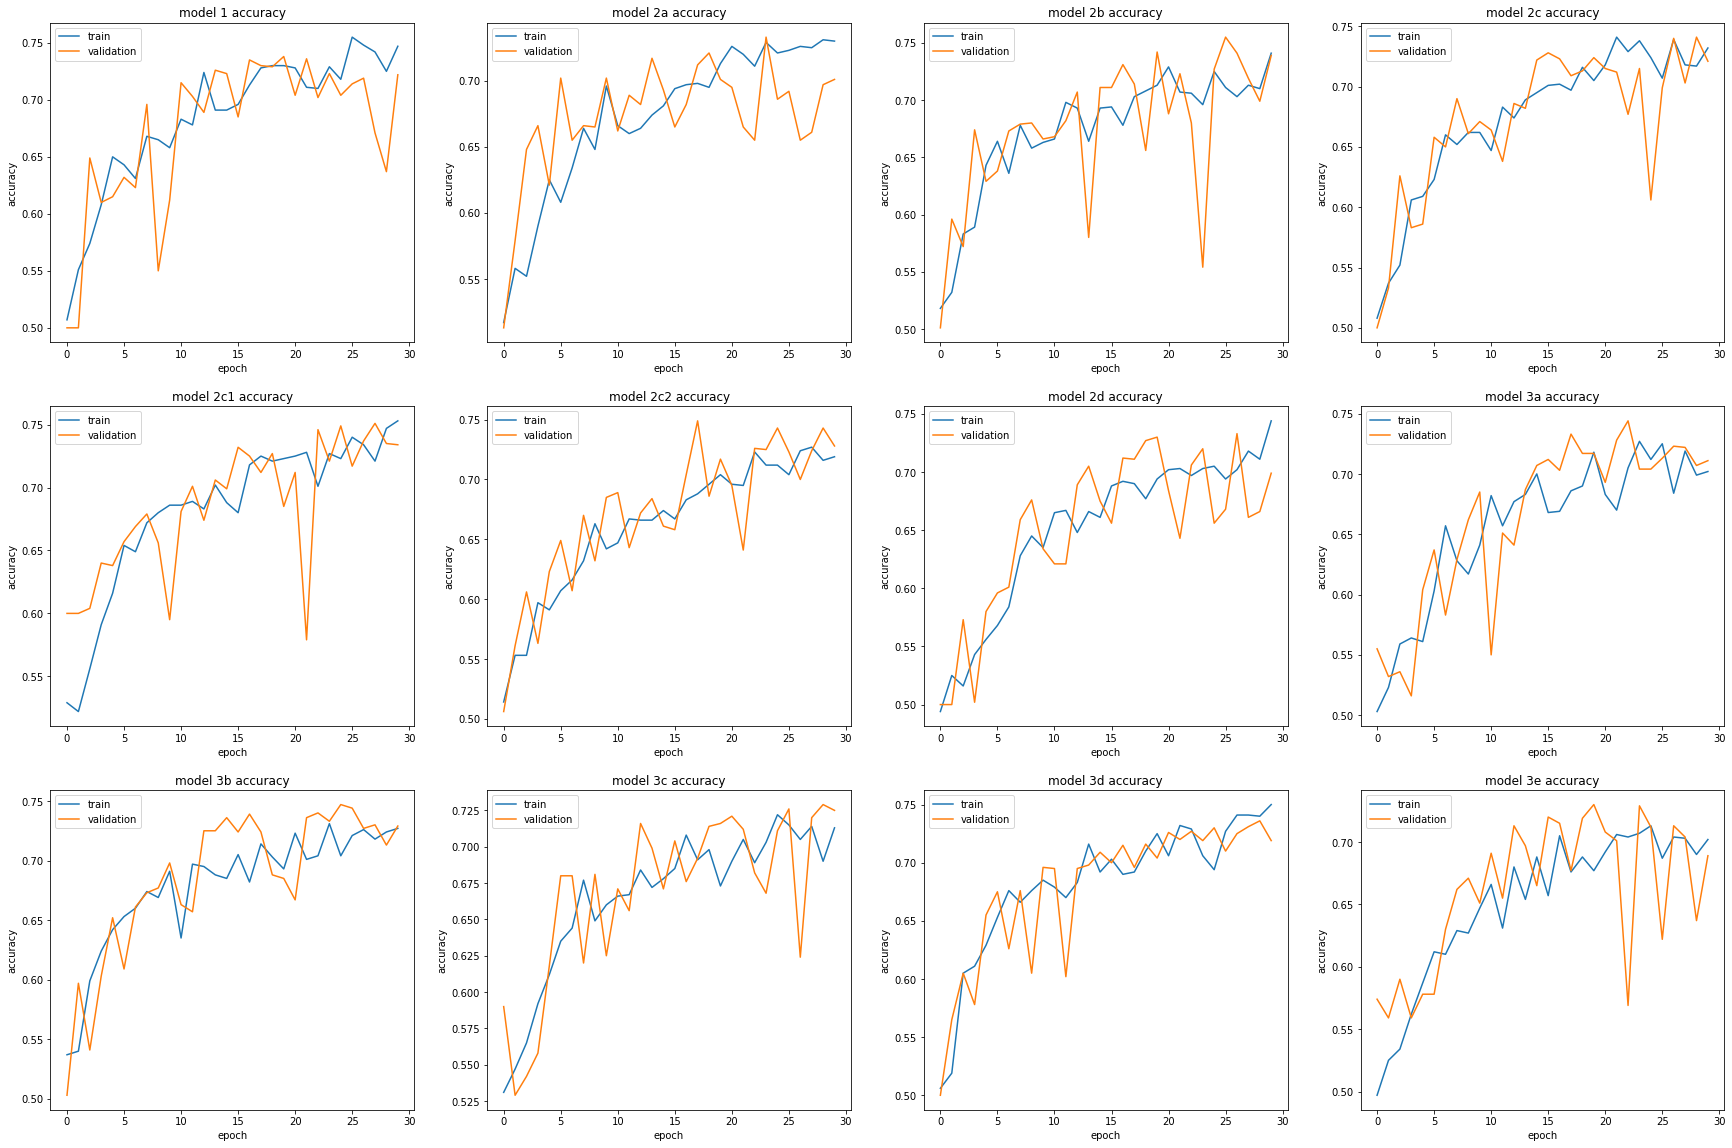

In [ ]:
plt.figure(figsize=(30, 20)) #sets figure sizes

#shows all of the previous plots side by side

plt.subplot(3, 4, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 2)
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.title('model 2a accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 3)
plt.plot(history2b.history['accuracy'])
plt.plot(history2b.history['val_accuracy'])
plt.title('model 2b accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 4)
plt.plot(history2c.history['accuracy'])
plt.plot(history2c.history['val_accuracy'])
plt.title('model 2c accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 5)
plt.plot(history2c1.history['accuracy'])
plt.plot(history2c1.history['val_accuracy'])
plt.title('model 2c1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 6)
plt.plot(history2c2.history['accuracy'])
plt.plot(history2c2.history['val_accuracy'])
plt.title('model 2c2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 7)
plt.plot(history2d.history['accuracy'])
plt.plot(history2d.history['val_accuracy'])
plt.title('model 2d accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 8)
plt.plot(history3a.history['accuracy'])
plt.plot(history3a.history['val_accuracy'])
plt.title('model 3a accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 9)
plt.plot(history3b.history['accuracy'])
plt.plot(history3b.history['val_accuracy'])
plt.title('model 3b accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 10)
plt.plot(history3c.history['accuracy'])
plt.plot(history3c.history['val_accuracy'])
plt.title('model 3c accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 11)
plt.plot(history3d.history['accuracy'])
plt.plot(history3d.history['val_accuracy'])
plt.title('model 3d accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(3, 4, 12)
plt.plot(history3e.history['accuracy'])
plt.plot(history3e.history['val_accuracy'])
plt.title('model 3e accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')